# GDP Analysis(Data I-A)

**NOTE: Input excel files are in same folder as my .ipynb file**

In [82]:
# importing all the necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [83]:
# importing the dataset(Data I-A)
# Dataset name: ab40c054-5031-4376-b52e-9813e776f65e.csv

df1=pd.read_csv('ab40c054-5031-4376-b52e-9813e776f65e.csv',engine='python',encoding='utf-8')

*****************************************Handling Missing Data*****************************************************************

In [84]:
# Index 5 and 10 having maximum numbers of null values.

df1.isnull().sum(axis=1)


0      1
1      1
2      1
3      1
4     10
5     23
6      1
7      1
8      1
9     10
10    23
dtype: int64

In [85]:
# Removing the rows(Index 5 and 10): '(% Growth over the previous year)'
# and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

sf=pd.concat([df1[0:5],df1[6:10]],axis=0)
sf.isnull().sum(axis=1)

0     1
1     1
2     1
3     1
4    10
6     1
7     1
8     1
9    10
dtype: int64

In [86]:
# Column "West Bengal1" is having null data

sf.isnull().sum(axis=0)
sf[sorted(sf.columns,reverse=True)]


,West Bengal1,Uttarakhand,Uttar Pradesh,Tripura,Telangana,Tamil Nadu,Sikkim,Rajasthan,Punjab,Puducherry,...,Duration,Delhi,Chhattisgarh,Chandigarh,Bihar,Assam,Arunachal Pradesh,Andhra Pradesh,Andaman & Nicobar Islands,All_India GDP
0,NaN,115523.00,724049.00,19208.00,359433.00,751485.00,11165.00,436465.00,266628.00,16818.00,...,2011-12,343767.00,158074.00,18768.00,247144.00,143175.00,11063.00,379402.00,3979.00,8736039.00
1,NaN,131835.00,822903.00,21663.00,401493.00,855481.00,12338.00,494004.00,297734.00,18875.00,...,2012-13,391238.00,177511.00,21609.00,282368.00,156864.00,12547.00,411404.00,4421.00,9946636.00
2,NaN,149817.00,944146.00,25593.00,452186.00,971090.00,13862.00,549701.00,334714.00,21870.00,...,2013-14,443783.00,206690.00,24787.00,317101.00,177745.00,14602.00,464272.00,5159.00,11236635.00
3,NaN,161985.00,1043371.00,29667.00,511178.00,1092564.00,15209.00,612194.00,368011.00,24089.00,...,2014-15,492424.00,234982.00,27844.00,373920.00,198098.00,16761.00,526468.00,5721.00,12433749.00
4,NaN,184091.00,1153795.00,NaN,575631.00,1212668.00,16637.00,NaN,NaN,26533.00,...,2015-16,551963.00,260776.00,30304.00,413503.00,224234.00,18784.00,609934.00,NaN,13675331.00
6,NaN,14.12,13.65,12.78,11.70,13.84,10.51,13.18,11.67,12.23,...,2012-13,13.81,12.30,15.14,14.25,9.56,13.41,8.43,11.13,13.86
7,NaN,13.64,14.73,18.14,12.63,13.51,12.35,11.27,12.42,15.87,...,2013-14,13.43,16.44,14.71,12.30,13.31,16.38,12.85,16.68,12.97
8,NaN,8.12,10.51,15.92,13.05,12.51,9.72,11.37,9.95,10.14,...,2014-15,10.96,13.69,12.33,17.92,11.45,14.79,13.40,10.89,10.65
9,NaN,13.65,10.58,NaN,12.61,10.99,9.39,NaN,NaN,10.15,...,2015-16,12.09,10.98,8.84,10.59,13.19,12.07,15.85,NaN,9.99


In [87]:
# Removing the column="West Bengal1" as it has all null values

sf=sf.loc[:,~sf.columns.isin(["West Bengal1"])]
sf.isnull().sum(axis=1)

0    0
1    0
2    0
3    0
4    9
6    0
7    0
8    0
9    9
dtype: int64

In [88]:
# Removing the columns(States) which having null values for 2015-16 

# As it is the best approach to get the data transformed without predicting any approximating values.

sf=sf.loc[:,~sf.columns.isin(["Himachal Pradesh",'Maharashtra','Manipur','Mizoram',
                              'Nagaland','Punjab','Rajasthan','Tripura','Andaman & Nicobar Islands'])]
sf.isnull().sum(axis=1)

0    0
1    0
2    0
3    0
4    0
6    0
7    0
8    0
9    0
dtype: int64

In [89]:
# We now have a dataframe with no missing values.

# Let's finally look the observation at how much we have lost in the process:

print(round(100-len(sf.columns)/len(df1.columns)*100,2),'%')

27.78 %


So, we lost around 28% observations in cleaning the missing values which is affordable.

-----------------------------------------------------------------------------------------------------------------------

In [91]:
# calculating the average growth of states over duartion 2012-13, 2013-14,2014-15 and 2015-16
# by "moving average"

m_avg=sf.loc[6:,'Duration':]

m_avg=m_avg.iloc[:,1:].rolling(window=2).mean() #rolling average calculating

# Making appropriate transformation like creating index and sorting the values

m_avg['Duration']=['2012-13','2013-14','2014-15','2015-16']
m_avg=m_avg.iloc[1:]
m_avg=m_avg.set_index('Duration',drop=True)
m_avg=m_avg.T
m_avg['Index']=range(len(m_avg))
m_avg['State']=m_avg.index
m_avg=m_avg.set_index('Index').sort_values(by='State')

m_avg.head(5)



Duration,2013-14,2014-15,2015-16,State
Index,,,,
23,13.415,11.810,10.320,All_India GDP
0,10.640,13.125,14.625,Andhra Pradesh
1,14.895,15.585,13.430,Arunachal Pradesh
2,11.435,12.380,12.320,Assam
3,13.275,15.110,14.255,Bihar


In [92]:
# Transfoming the dataframe into a catagorial view to plot

gsdp=m_avg.append(m_avg.iloc[0:,1:],sort=False)
gsdp.loc[np.isnan(gsdp['2013-14']),['2013-14']]=m_avg['2014-15']
gsdp=gsdp.append(gsdp.iloc[0:,1:],sort=False)
gsdp.loc[np.isnan(gsdp['2013-14']),['2013-14']]=m_avg['2015-16']
gsdp=gsdp.iloc[0:,0::3]

gsdp.columns=['Rolling_Average','State'] # Renaming the column names
gsdp.drop_duplicates(subset = None, keep = 'first', inplace = True)  # removing duplicates

# Updating the durations

gsdp['Duration']=['2013-14' for i in range(len(gsdp))]
gsdp.iloc[24:,2]='2014-15'
gsdp.iloc[48:,2]='2015-17'

gsdp['Rolling_Average']=gsdp['Rolling_Average'].apply(lambda x:round(x,2)) # rounding the decimal variables in 2
gsdp.sort_values(by=['Duration','Rolling_Average'],ascending=True,inplace=True) # sorting

gsdp.head(5)        

,Rolling_Average,State,Duration
Index,,,
5,-7.89,Goa,2013-14
13,7.34,Meghalaya,2013-14
0,10.64,Andhra Pradesh,2013-14
8,10.70,Jammu & Kashmir,2013-14
15,11.43,Sikkim,2013-14


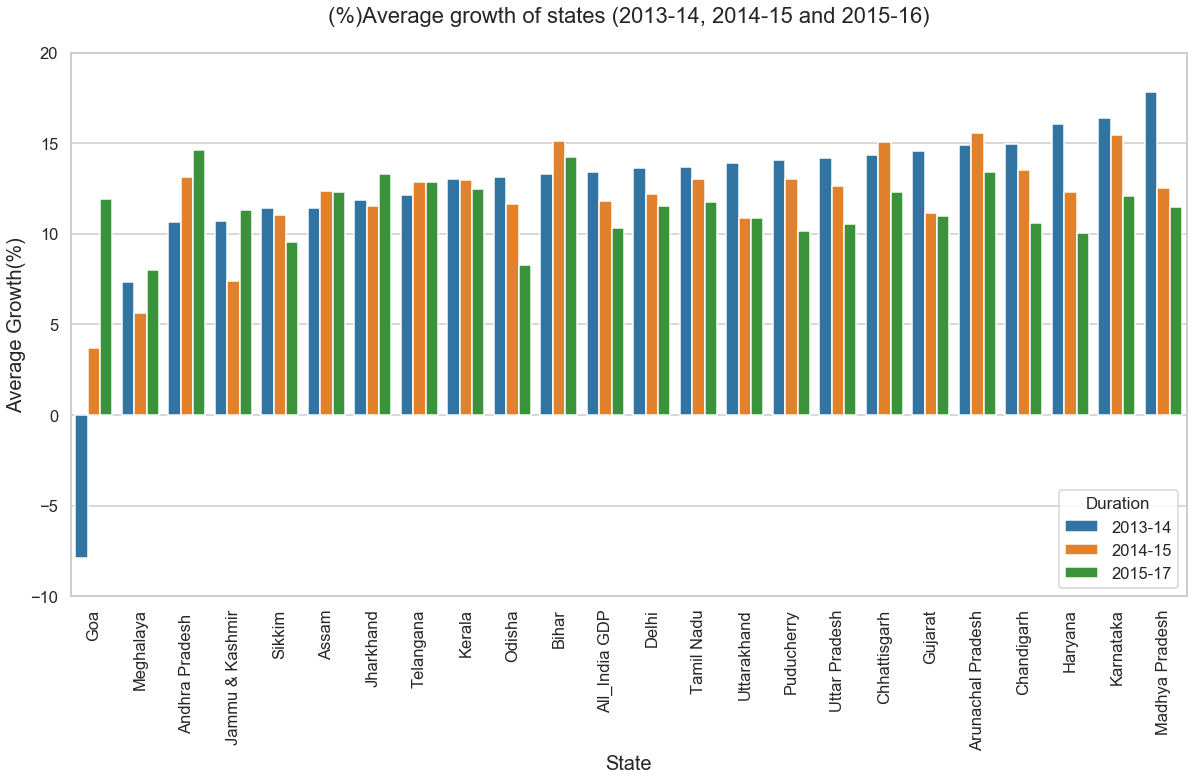

In [93]:
# Now Plotting

# Setting gridlines,context and size of the figure

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(20,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Using barplot for categorical visualisation

sns.barplot(x='State',y='Rolling_Average',hue='Duration',data=gsdp,palette='tab10')
plt.xticks(rotation=90)

# Setting labels for x-axis, y-axis and title

plt.xlabel('State')
plt.ylabel('Average Growth(%)')
plt.title("(%)Average growth of states"' '"(2013-14, 2014-15 and 2015-16)")

# Setting top and bottom value 

plt.ylim(top=20)
plt.ylim(bottom=-10)

# Executing

plt.show()

**Report: As we can see from above plot the states which are consistently growing fast are "Goa", "Andhra Pradesh".   
        The struggling states in terms of growth are "Madhya Pradesh", "Karnataka", "Haryana" and "Chandigarh".**

---------------------------

**Curiosity exercise:**

My home state: Data not available(West Bengal), so choosing random data for "My home state"

My home state: "Telangana"

In [94]:
# Calculating average growth rate of Telangana state

m_avg.loc[m_avg['State']=='Telangana']


Duration,2013-14,2014-15,2015-16,State
Index,,,,
17,12.165,12.84,12.83,Telangana


In [95]:
# Comparing My home state with National average over duration(2013-14,2014-15,2015-16)

# creating seperate dataframe

n_avg=sf.loc[6:,'Duration':]

n_avg=n_avg.iloc[:,1:].rolling(window=2).mean() # rolling average calculating

# Updating the durations

n_avg['Duration']=['2012-13','2013-14','2014-15','2015-16']
n_avg=n_avg.iloc[1:]
n_avg=n_avg.set_index('Duration',drop=True)
n_avg=n_avg.T

# Creating index and sorting

n_avg['Index']=range(len(n_avg))
n_avg['State']=n_avg.index
n_avg=n_avg.set_index('Index')

# Combining 'My home state' data with 'All India GDP'

home_nat=pd.concat([gsdp.loc[m_avg['State']=='Telangana'],gsdp.loc[n_avg.State=='All_India GDP',:]],axis=0)

home_nat


,Rolling_Average,State,Duration
Index,,,
17,12.16,Telangana,2013-14
17,12.84,Telangana,2014-15
17,12.83,Telangana,2015-17
23,13.41,All_India GDP,2013-14
23,11.81,All_India GDP,2014-15
23,10.32,All_India GDP,2015-17


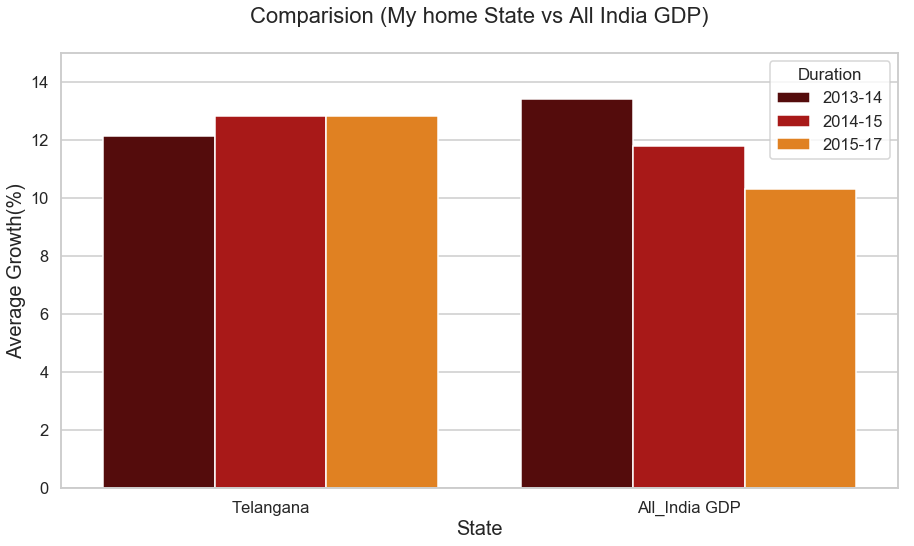

In [96]:
# visualising by plotting a bar chart

# Setting gridlines,context and size of the figure

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,8))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Using barplot for better visualisation

sns.barplot(x='State',y='Rolling_Average',hue='Duration',data=home_nat,palette='gist_heat')

# Setting labels for x-axis, y-axis and title

plt.xlabel('State')
plt.ylabel('Average Growth(%)')
plt.title("Comparision (My home State vs All India GDP)")

# Setting top value 

plt.ylim(top=15)


plt.show()


**As you can see the average of My home state i.e. "Telangana" is having positive growth when compared to National Average(All_india GDP) which is having negative growth consistently.**

---------------------------------------------------------------------------------------------------------------------------

**Plotting Total GDP of the states for the year 2015-16**

**Approach 1: By removing the columns which having null values for 2015-16 and plotting.**

In [97]:
# Creating dataframe to plot GDP across states

gdp=pd.concat([sf.iloc[4]],axis=1)
gdp.columns=['GSDP(`In Crores)']

# Creating index
gdp['State']=gdp.index

# Doing appropriate transformation like setting index and changing the datatype into int

gdp=gdp.iloc[2:-1]
gdp['Index']=range(len(gdp))
gdp['GSDP(`In Crores)']=gdp['GSDP(`In Crores)'].apply(lambda x:int(x))
gdp=gdp.set_index('Index',drop=True).sort_values("GSDP(`In Crores)",ascending=False)
gdp

,GSDP(`In Crores),State
Index,,
16,1212668,Tamil Nadu
18,1153795,Uttar Pradesh
10,1027068,Karnataka
6,994316,Gujarat
0,609934,Andhra Pradesh
11,588337,Kerala
17,575631,Telangana
21,551963,Delhi
12,543975,Madhya Pradesh


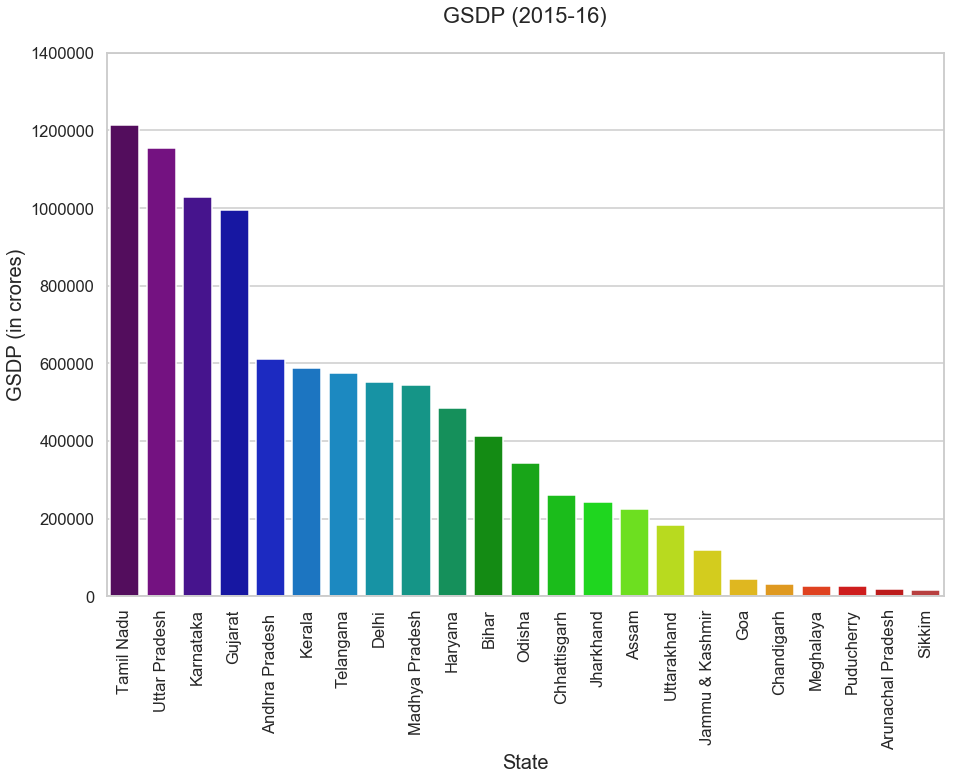

In [98]:
# Now Plotting

# Setting gridlines,context and size of the figure

sns.set_style("whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Using barplot for better visualisation

sns.barplot(x='State',y='GSDP(`In Crores)',data=gdp,palette='nipy_spectral')
plt.xticks(rotation=90)

# Setting labels for x-axis, y-axis and title

plt.xlabel("State")
plt.ylabel("GSDP (in crores)")
plt.title("GSDP (2015-16)")

# Setting top value 
plt.ylim(top=1400000)

plt.show()


**Report: Top-5 States=> "Tamil Nadu","Uttar Pradesh","Karnataka","Gujarat" and "Andhra Pradesh"       
        Bottom-5 States=> "Sikkim","Arunachal Pradesh","Puducherry","Meghalaya" and "Chandigarh"**

--------------

**Approach 2 : By calculating a statistical measure from previous year('2012-13','2013-14','2014-15') and filling the null values for Item description 'GSDP - CURRENT PRICES (` in Crore)' in column '2015-16' and plotting**

In [99]:
# Removing the rows(Index 5 and 10): '(% Growth over the previous year)'
# and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
# and column 'West Bengal1' as all the data is null and 'All India GDP' column as well since we will deal with the states

df=df1
df=pd.concat([df1[0:5],df1[6:10]],axis=0)
df.isnull().sum(axis=1)
df=df.loc[:,~df.columns.isin(['West Bengal1','All_India GDP'])]

# Selecting only the Item description 'GSDP - CURRENT PRICES (` in Crore)' 

df=df.iloc[:5,1:]
df.head(5)

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry
0,2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,...,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0
1,2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,...,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0
2,2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,...,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0
3,2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,...,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0
4,2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,...,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0


In [100]:
df.isnull().sum()

Duration                     0
Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             1
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  1
Manipur                      1
Meghalaya                    0
Mizoram                      1
Nagaland                     1
Odisha                       0
Punjab                       1
Rajasthan                    1
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      1
Uttar Pradesh                0
Uttarakhand                  0
Andaman & Nicobar Islands    1
Chandigarh                   0
Delhi                        0
Puducher

 So, states which are having null values are 'Himachal Pradesh', 'Maharashtra', 'Manipur', 'Mizoram' , 'Nagaland',
     'Punjab', 'Rajasthan', 'Tripura' and 'Andaman & Nicobar Islands'.

In [101]:
df.loc[:,'Himachal Pradesh'].describe()

count         4.000000
mean      88668.250000
std       13810.870414
min       72720.000000
25%       80295.000000
50%       88792.000000
75%       97165.250000
max      104369.000000
Name: Himachal Pradesh, dtype: float64

As the Item 'GSDP - CURRENT PRICES (` in Crore`) values are incremental from duartion '2011-12' to '2014-15' for all states hence from the above describe table(reference taken from one state) we can see that the std value is ideal for this to fill the null values with the sum of the standard deviation and from latest duartion i.e. '2014-15'

In [102]:
# Filing null values 

df.loc[:,'Himachal Pradesh']=df.loc[:,'Himachal Pradesh'].fillna(df.loc[3,'Himachal Pradesh']+df.loc[:,'Himachal Pradesh'].std())
df.loc[:,'Maharashtra']=df.loc[:,'Maharashtra'].fillna(df.loc[3,'Maharashtra']+df.loc[:,'Maharashtra'].std())
df.loc[:,'Manipur']=df.loc[:,'Manipur'].fillna(df.loc[3,'Manipur']+df.loc[:,'Manipur'].std())
df.loc[:,'Mizoram']=df.loc[:,'Mizoram'].fillna(df.loc[3,'Mizoram']+df.loc[:,'Mizoram'].std())
df.loc[:,'Nagaland']=df.loc[:,'Nagaland'].fillna(df.loc[3,'Nagaland']+df.loc[:,'Nagaland'].std())
df.loc[:,'Punjab']=df.loc[:,'Punjab'].fillna(df.loc[3,'Punjab']+df.loc[:,'Punjab'].std())
df.loc[:,'Rajasthan']=df.loc[:,'Rajasthan'].fillna(df.loc[3,'Rajasthan']+df.loc[:,'Rajasthan'].std())
df.loc[:,'Tripura']=df.loc[:,'Tripura'].fillna(df.loc[3,'Tripura']+df.loc[:,'Tripura'].std())
df.loc[:,'Andaman & Nicobar Islands']=df.loc[:,'Andaman & Nicobar Islands'].fillna(df.loc[3,'Andaman & Nicobar Islands']+df.loc[:,'Andaman & Nicobar Islands'].std())

In [103]:
df=pd.concat([df.iloc[4]],axis=1)
df=pd.concat([df.iloc[2:-1,]],axis=1)
df.columns=['GSDP(`In Crores)']

# Creating index
df['State']=df.index

# Doing appropriate transformation like setting index and changing the datatype into int

df['Index']=range(len(df))
df=df.set_index('Index',drop=True).sort_values("GSDP(`In Crores)",ascending=False)
df['GSDP(`In Crores)']=df['GSDP(`In Crores)'].apply(lambda x:int(x))
df.head(5)

,GSDP(`In Crores),State
Index,,
13,2019284,Maharashtra
22,1212668,Tamil Nadu
25,1153795,Uttar Pradesh
10,1027068,Karnataka
5,994316,Gujarat


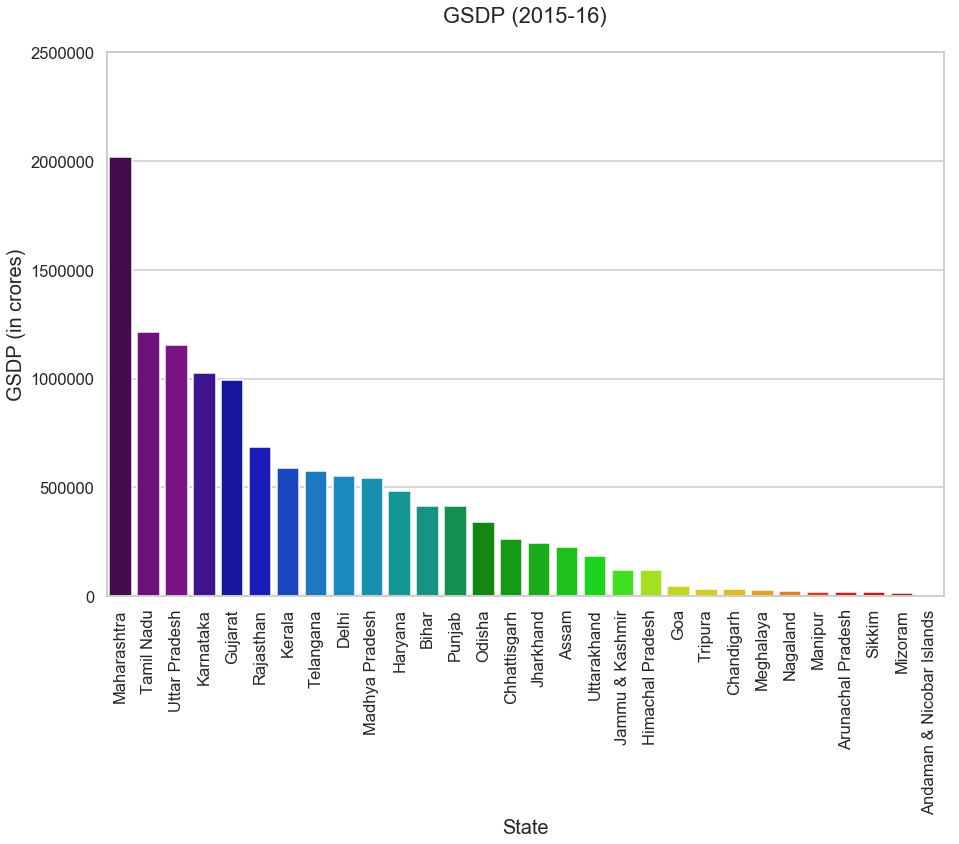

In [104]:
# Now Plotting

# Setting gridlines,context and size of the figure

sns.set_style("whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Using barplot for better visualisation

sns.barplot(x='State',y='GSDP(`In Crores)',data=df,palette='nipy_spectral')
plt.xticks(rotation=90)

# Setting labels for x-axis, y-axis and title

plt.xlabel("State")
plt.ylabel("GSDP (in crores)")
plt.title("GSDP (2015-16)")

# Setting top value 
plt.ylim(top=2500000)

plt.show()


**Report: Top-5 States=>** "Maharasthra", "Tamil Nadu", "Uttar Pradesh", "Karnataka" and "Gujarat"              
**Bottom-5 States=>** "Andaman & Nicobar Islands", "Mizoram", "Sikkim", "Arunachal Pradesh" and "Manipur"

**As we can see there is a difference between " Approach 1" and " Approach 2" in Top-5 States and Bottom-5 States**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Data Analysis(Data I-B)

**As mentioned at the top of this notebook, 
  Input files are in same folder as my .ipynb file**

In [105]:
# Merging all Data I-B csv files into one dataframe and retaining only for the duartion: 2014-15

# Taking all the files from current working directory

files=os.listdir(os.getcwd())

concated=[]

# Appending all the Data I-B related files into one dataframe

for i in files:
    if i.find("GSVA")>0 and i.find(".csv")>0:
        gsva=pd.read_csv(i,engine='python',encoding='ISO-8859-1')
        gsva["State"]=i.split('-')[1] # Adding State column for each dataset
        concated.append(gsva)

# Converting the list into Dataframe

gsva_2=pd.concat(concated,sort=False)

# Retaining the data only for the duration : 2014-15

gsva_2=gsva_2.loc[:,~gsva_2.columns.isin(['2011-12','2012-13','2013-14','2015-16','2016-17'])]

gsva_2.head()


,S.No.,Item,2014-15,State
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra_Pradesh
1,1.1,Crops,7893514.0,Andhra_Pradesh
2,1.2,Livestock,4309078.0,Andhra_Pradesh
3,1.3,Forestry and logging,346160.0,Andhra_Pradesh
4,1.4,Fishing and aquaculture,2270664.0,Andhra_Pradesh


In [106]:
# Filtering Union territories

gsva_1=gsva_2
union_territory=['Delhi','Chandigarh','Puducherry','Andaman and Nicobar Islands',
            'Daman and Diu','Dadra and Nagar Haveli','Lakshadweep']
count=[]
for un in gsva_1.State:
    if un in union_territory:
        count.append(un)
        
set(count)       


{'Chandigarh', 'Delhi', 'Puducherry'}

As we can see three Union territories('Chandigarh', 'Delhi', 'Puducherry') were present in the dataframe which needs to be filtered out.

In [107]:
# Filtering "Puducherry"

# Creating index

gsva_1['Index']=range(len(gsva_1))
gsva_1.set_index('Index',inplace=True)

# Taking the index value

p_max=max(gsva_1.loc[gsva_1["State"]=='Puducherry'].index)
p_min=min(gsva_1.loc[gsva_1["State"]=='Puducherry'].index)

# Now filtering

gsva_1=pd.concat([gsva_1.iloc[0:p_min],gsva_1.iloc[p_max+1:]],sort=False)


# Filtering "Delhi"

# Taking the index value

d_max=max(gsva_1.loc[gsva_1["State"]=='Delhi'].index)
d_min=min(gsva_1.loc[gsva_1["State"]=='Delhi'].index)

# Now filtering

gsva_1=pd.concat([gsva_1.iloc[0:d_min],gsva_1.iloc[d_max+1:]],sort=False)

# Filtering "Chandigarh"

# Taking the index value

c_max=max(gsva_1.loc[gsva_1["State"]=='Chandigarh'].index)
c_min=min(gsva_1.loc[gsva_1["State"]=='Chandigarh'].index)

# Now filtering

gsva_1=pd.concat([gsva_1.iloc[0:c_min],gsva_1.iloc[c_max+1:]],sort=False)

In [108]:
# Checking for Union territory

count1=[]        
count1=[count1.append(un) for un in gsva_1.State if un in union_territory]
set(count1) 

set()

As we can see the set is empty which means all the "Union Territories" were filtered out from the dataframe for further analysis. 

In [109]:
# Cleaning the dataframe/ handling missig data

gsva_1.isnull().sum(axis=0)

S.No.       0
Item        0
2014-15    16
State       0
dtype: int64

As we can see that there are 16 rows with nulll values for column "2014-15". Let's find out which state they belong

In [110]:
gsva_1[gsva_1.isnull().sum(axis=1)==1]

,S.No.,Item,2014-15,State
Index,,,,
277,6.2,Hotels & restaurants,NaN,Gujarat
280,7.2,Road transport,NaN,Gujarat
281,7.3,Water transport,NaN,Gujarat
282,7.4,Air transport,NaN,Gujarat
314,7.3,Water transport,NaN,Haryana
315,7.4,Air transport,NaN,Haryana
533,2.,Mining and quarrying,NaN,Manipur
545,7.3,Water transport,NaN,Manipur
548,7.6,Storage,NaN,Manipur


As we can see there are 6 states which having null values for mentioned items. we will drop these 16 null values items and will process with our next analysis. 

In [111]:
# Dropping the null rows 

gsva_1=gsva_1.drop(gsva_1[gsva_1.isnull().sum(axis=1)==1].index)



In [112]:
# checking for null values if any

gsva_1.isnull().sum(axis=0)

S.No.      0
Item       0
2014-15    0
State      0
dtype: int64

So, we have cleaned our dataframe and it is good to go with our next analysis

-------------------------------------------------------------------------------------------------------------------------------

**Plotting GDP per capita for all states**

In [113]:
# converting the data type for column "2014-15" into integer

gsva_1["2014-15"]=gsva_1["2014-15"].apply(lambda x:int(x))

In [114]:
# Filtering and sorting the GDP per capita for all states and inserting into new dataframe

gsva_per_cap=gsva_1[gsva_1["Item"]=='Per Capita GSDP (Rs.)'].sort_values(by='2014-15',axis=0,ascending=False,inplace=False)


gsva_per_cap.head()

,S.No.,Item,2014-15,State
Index,,,,
263,17,Per Capita GSDP (Rs.),271793,Goa
824,17,Per Capita GSDP (Rs.),240274,Sikkim
329,17,Per Capita GSDP (Rs.),164077,Haryana
461,17,Per Capita GSDP (Rs.),154778,Kerala
956,17,Per Capita GSDP (Rs.),153076,Uttarakhand


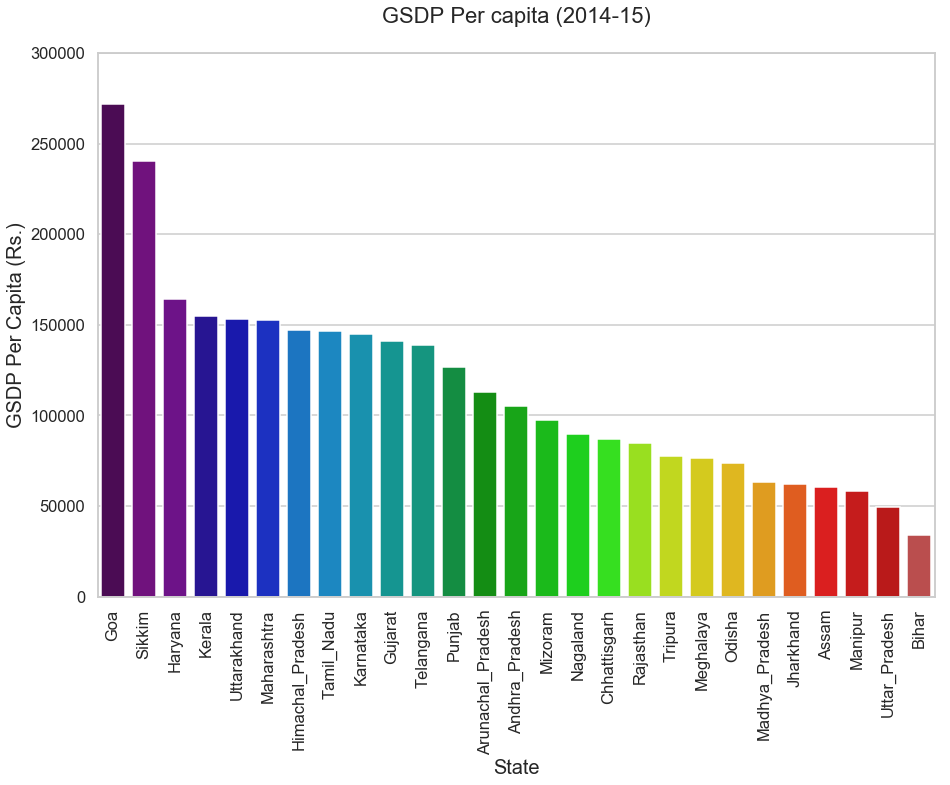

In [115]:
# Now Plotting

# Setting gridlines,context and size of the figure

sns.set_style("whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

# Using barplot for better visualisation

sns.barplot(x='State',y='2014-15',data=gsva_per_cap,palette='nipy_spectral')
plt.xticks(rotation=90)

# Setting labels for x-axis, y-axis and title

plt.xlabel("State")
plt.ylabel("GSDP Per Capita (Rs.)")
plt.title("GSDP Per capita (2014-15)")

# Setting top value 

plt.ylim(top=300000)

plt.show()


                                 
**Top-5=> "Goa", "Sikkim", "Haryana", "Kerala" and "Uttarakhand"   
Bottom-5=> "Bihar", "Uttar_Pradesh", "Manipur", "Assam" and "Jharkhand"**

In [116]:
# Ratio of highest per capita GSDP vs Lowest per capita GSDP

# As we can see the highest per capita gdp is "Goa" and lowest per capita is "Bihar"

# Taking the values of Per Capita GSDP (Rs.) in "Goa" and "Bihar"

rt_goa=gsva_1.loc[gsva_1["State"]=='Goa']
rt_goa=rt_goa.loc[rt_goa["Item"]=="Per Capita GSDP (Rs.)"]

rt_bihar=gsva_1.loc[gsva_1["State"]=='Bihar']
rt_bihar=rt_bihar.loc[rt_bihar["Item"]=="Per Capita GSDP (Rs.)"]

# Calulating the ratio of Per Capita GSDP (Rs.) in "Goa" and "Bihar"

ratio=[round(i,2) for i in np.array(rt_goa.loc[:,"2014-15"])/np.array(rt_bihar.loc[:,"2014-15"])]

ratio


[8.0]

**The ratio of highest per capita gdp('Goa') to the lowest per capita gdp('Bihar') is 8.0**

------------------------------------------

**Percentage contribution of primary secondary and tertiary sectors as a percentage of total GDP for all states**

In [117]:
# Creating  a dataframe for primary secondary and tertiary sectors with GDP for all states

pst_gsdp=gsva_1.loc[gsva_1['S.No.']=='Total'].sort_values(by=['State','Item'],ascending=True,inplace=False)

# Separating each sectors i.e. Primary, Secondary and Tertiary 

primary=gsva_1.loc[gsva_1['Item']=='Primary']
primary=primary.sort_values(by='State')

secondary=gsva_1.loc[gsva_1['Item']=='Secondary']
secondary=secondary.sort_values(by='State')

tertiary=gsva_1.loc[gsva_1['Item']=='Tertiary']
tertiary=tertiary.sort_values(by='State')

# Seperating GSDP by state

gross=gsva_1.loc[gsva_1['Item']=='Gross State Domestic Product']
gross=gross.sort_values(by='State')

# Now calculating the % Contribution as a percentage of total GDP for all states

primary_contribution=round(primary['2014-15'].sum()/gross['2014-15'].sum()*100,2)
secondary_contribution=round(secondary['2014-15'].sum()/gross['2014-15'].sum()*100,2)
tertiary_contribution=round(tertiary['2014-15'].sum()/gross['2014-15'].sum()*100,2)


# Adding all the sectors(Primary, Secondary and Tertiary) into one list for plotting

pst_contribution=[]
pst_contribution.append(primary_contribution)
pst_contribution.append(secondary_contribution)
pst_contribution.append(tertiary_contribution)
pst_contribution.append(round(100-sum(pst_contribution),2))
pst_contribution

[19.69, 25.93, 46.06, 8.32]

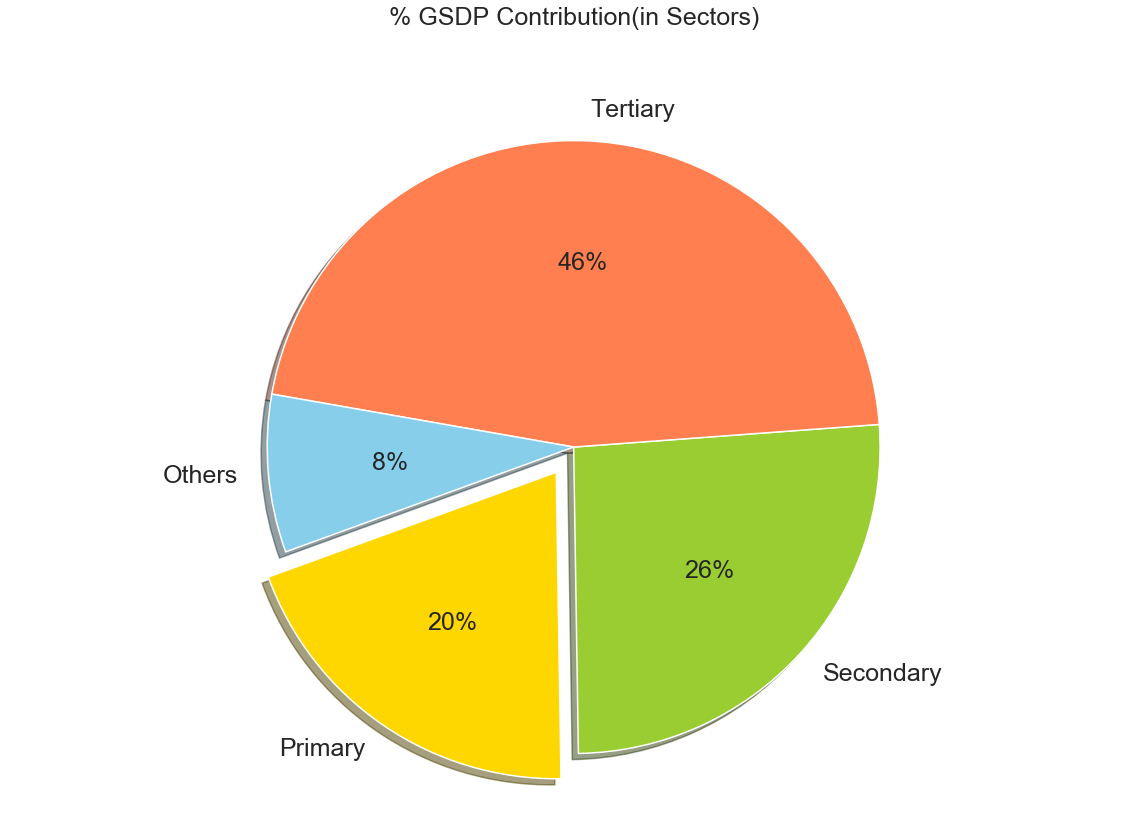

In [119]:
# Now Plotting

# Setting context, size of the figure

sns.set_context('talk')
plt.figure(figsize=(20,13))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] =80

# Using pie chart for percentage contribution visualisation

plt.title("% GSDP Contribution(in Sectors)",loc='center')


# Data to plot

labels = 'Primary', 'Secondary', 'Tertiary', 'Others'
colors = ['gold', 'yellowgreen', 'coral', 'skyblue']
explode=[0.1,0,0,0] # Primary sector will cut out
    
# Plotting

plt.pie(pst_contribution, labels=labels,explode=explode, colors=colors,labeldistance=1.1,
autopct='%1.0f%%', shadow=True, startangle=200,textprops={'fontsize': 25}) 
plt.axis('equal')

plt.show()


------------------------------------------

**Categorizing the states into four based on GDP per capita(C1, C2, C3, C4)
C1 is the highest per capita GDP and C4 is the lowest.**

The quantile values are (0.20,0.5, 0.85, 1), i.e. the states lying between the 85th and the 100th percentile are in C1, 
those between 50th and 85th percentile are in C2 and so on.

In [120]:
# Before initiating the calculation of quantile 
# we have to sort the dataframe

gsva_per_cap=gsva_per_cap.sort_values(by='2014-15',ascending=False)
gsva_per_cap.head(5)

,S.No.,Item,2014-15,State
Index,,,,
263,17,Per Capita GSDP (Rs.),271793,Goa
824,17,Per Capita GSDP (Rs.),240274,Sikkim
329,17,Per Capita GSDP (Rs.),164077,Haryana
461,17,Per Capita GSDP (Rs.),154778,Kerala
956,17,Per Capita GSDP (Rs.),153076,Uttarakhand


In [121]:
# Now, calculating quantile with values [0.20,0.50,0.85,1] 
# and converting the output ito numpy data-type to categorize the value

first=gsva_per_cap['2014-15'].quantile([0.20,0.50,0.85,1])[0.20]
second=gsva_per_cap['2014-15'].quantile([0.20,0.50,0.85,1])[0.50]
third=gsva_per_cap['2014-15'].quantile([0.20,0.50,0.85,1])[0.85]
fourth=gsva_per_cap['2014-15'].quantile([0.20,0.50,0.85,1])[1]



In [122]:
# Lastly, Categorizing each state based on GDP per capita(C1, C2, C3, C4) 

# C1 is the highest per capita GDP and C4 is the lowest.

gsva_per_cap["Category"]=""

# Now categorizing

for i in range(len(gsva_per_cap)):
    if gsva_per_cap.iloc[i,2]<=first:
        gsva_per_cap.iloc[i,4]='c4'
    elif gsva_per_cap.iloc[i,2]>first and gsva_per_cap.iloc[i,2]<=second:
            gsva_per_cap.iloc[i,4]='c3'
    elif gsva_per_cap.iloc[i,2]>second and gsva_per_cap.iloc[i,2]<=third:
        gsva_per_cap.iloc[i,4]='c2'
    elif gsva_per_cap.iloc[i,2]>third and gsva_per_cap.iloc[i,2]<=fourth:
        gsva_per_cap.iloc[i,4]='c1'
    else:
        print("Incorrect data inserted")

gsva_per_cap.head(5)

,S.No.,Item,2014-15,State,Category
Index,,,,,
263,17,Per Capita GSDP (Rs.),271793,Goa,c1
824,17,Per Capita GSDP (Rs.),240274,Sikkim,c1
329,17,Per Capita GSDP (Rs.),164077,Haryana,c1
461,17,Per Capita GSDP (Rs.),154778,Kerala,c1
956,17,Per Capita GSDP (Rs.),153076,Uttarakhand,c2


**Finding the top 3/4/5 sub-sectors for each category C1,C2,C3 and C4**

In [123]:
# Lets find the states which are in the category C1,C2,C3 and C4

# For C1 category

gsva_per_cap.loc[gsva_per_cap['Category']=='c1']

# so, the states which are in category C1 are "Goa","Sikkim","Haryana" and "Kerala"


,S.No.,Item,2014-15,State,Category
Index,,,,,
263,17,Per Capita GSDP (Rs.),271793,Goa,c1
824,17,Per Capita GSDP (Rs.),240274,Sikkim,c1
329,17,Per Capita GSDP (Rs.),164077,Haryana,c1
461,17,Per Capita GSDP (Rs.),154778,Kerala,c1


In [124]:
# For C2 category

gsva_per_cap.loc[gsva_per_cap['Category']=='c2']

# so, the states which are in category C2 are
# "Uttarakhand","Maharashtra","Himachal Pradesh", "Tamil Nadu", "Karnataka" ,"Gujarat", "Telangana"
# "Punjab" and "Arunachal Pradesh"

,S.No.,Item,2014-15,State,Category
Index,,,,,
956,17,Per Capita GSDP (Rs.),153076,Uttarakhand,c2
527,17,Per Capita GSDP (Rs.),152853,Maharashtra,c2
362,17,Per Capita GSDP (Rs.),147330,Himachal_Pradesh,c2
857,17,Per Capita GSDP (Rs.),146503,Tamil_Nadu,c2
428,17,Per Capita GSDP (Rs.),145141,Karnataka,c2
296,17,Per Capita GSDP (Rs.),141263,Gujarat,c2
890,17,Per Capita GSDP (Rs.),139035,Telangana,c2
758,17,Per Capita GSDP (Rs.),126606,Punjab,c2
65,17,Per Capita GSDP (Rs.),112718,Arunachal_Pradesh,c2


In [125]:
# For C3 category

gsva_per_cap.loc[gsva_per_cap['Category']=='c3']

# so, the states which are in category C3 are
# "Andhra Pradesh","Mizoram","Nagaland", "Chhattisgarh", "Rajasthan" ,"Tripura", "Meghalaya"
# and "Odisha"

,S.No.,Item,2014-15,State,Category
Index,,,,,
32,17,Per Capita GSDP (Rs.),104977,Andhra_Pradesh,c3
626,17,Per Capita GSDP (Rs.),97687,Mizoram,c3
659,17,Per Capita GSDP (Rs.),89607,Nagaland,c3
197,17,Per Capita GSDP (Rs.),86860,Chhattisgarh,c3
791,17,Per Capita GSDP (Rs.),84837,Rajasthan,c3
923,17,Per Capita GSDP (Rs.),77358,Tripura,c3
593,17,Per Capita GSDP (Rs.),76228,Meghalaya,c3
692,17,Per Capita GSDP (Rs.),73979,Odisha,c3


In [126]:
# For C4 category

gsva_per_cap.loc[gsva_per_cap['Category']=='c4']

# so, the states which are in category C4 are
# "Madhya Pradesh","Jharkhand","Assam", "Manipur", "Uttar_Pradesh" and "Bihar"

,S.No.,Item,2014-15,State,Category
Index,,,,,
494,17,Per Capita GSDP (Rs.),62989,Madhya_Pradesh,c4
395,17,Per Capita GSDP (Rs.),62091,Jharkhand,c4
98,17,Per Capita GSDP (Rs.),60621,Assam,c4
560,17,Per Capita GSDP (Rs.),58442,Manipur,c4
989,17,Per Capita GSDP (Rs.),49450,Uttar_Pradesh,c4
131,17,Per Capita GSDP (Rs.),33954,Bihar,c4


In [127]:
# Removing sectors and sub-sub-sectors and keeping sub-sector and GSDP in the dataframe

sec_drop=gsva_1

delete=["TOTAL GSVA at basic prices","Tertiary","Secondary","Primary",
        "Per Capita GSDP (Rs.)","Population ('00)","Taxes on Products","Subsidies on products"]

for i in range(len(delete)):
    sec_drop=sec_drop.drop(sec_drop[sec_drop.loc[:,'Item']==delete[i]].index)
    
delete1=["1.1","1.2","1.3","1.4","6.1","6.2","7.1","7.2","7.3","7.4","7.5","7.6","7.7"]

for i in range(len(delete1)):
    sec_drop=sec_drop.drop(sec_drop[sec_drop.loc[:,'S.No.']==delete1[i]].index)
    
sec_drop.head()   


,S.No.,Item,2014-15,State
Index,,,,
0,1,"Agriculture, forestry and fishing",14819416,Andhra_Pradesh
5,2,Mining and quarrying,1484300,Andhra_Pradesh
7,3,Manufacturing,4672266,Andhra_Pradesh
8,4,"Electricity, gas, water supply & other utility...",1151729,Andhra_Pradesh
9,5,Construction,4664889,Andhra_Pradesh


In [128]:
# For C1 category the top sub-sectors contribute to approx. 80% of the GDP

# Taking all the values for C1 category and sorting it

region=["Goa","Sikkim","Haryana","Kerala"]
c1_cat=[]
for i in range(len(region)):
    c1_cat.append(sec_drop.loc[sec_drop['State']==region[i]])
c1_cat=pd.concat(c1_cat)
c1_cat.sort_values(by='Item',inplace=True)

# Now, grouping the sub-sectors and indexing and then calulating the %contribution for this sub-sector

grouping=c1_cat.groupby(by=['Item'])
c1_category=grouping.sum().sort_values('2014-15',ascending=False)
c1_category['Item']=c1_category.index
c1_category['Index']=range(len(c1_category))
c1_category.set_index('Index',inplace=True)
c1_category["%contribution"]=round(c1_category.loc[:,'2014-15']/c1_category.loc[0,'2014-15']*100,2)
c1_category=c1_category.iloc[1:,]

# Lastly our data is created where we can find the top sub-sectors 
# which are contributing approx. 80% to the GSDP in this sector

top_sub_sectors_c1=[]
for i in range(len(c1_category)):
    if c1_category.loc[:i+1,"%contribution"].sum()>=79 and c1_category.loc[:i+1,"%contribution"].sum()<=82:
        top_sub_sectors_c1.append(c1_category.loc[:i+1,"Item"])

top_sub_sectors_c1



[Index
 1    Real estate, ownership of dwelling & professio...
 2                    Agriculture, forestry and fishing
 3                Trade, repair, hotels and restaurants
 4                                        Manufacturing
 5                                         Construction
 6                                       Other services
 7    Transport, storage, communication & services r...
 Name: Item, dtype: object]

**Top sub-sectors(C1 Category)=> "Real estate, ownership of dwelling & professional services" ,
                               "Agriculture, forestry and fishing",
                               "Trade, repair, hotels and restaurants","Manufacturing","Construction","Other services"
                               and "Transport, storage, communication & services related to broadcasting"**

In [129]:

# For C2 category the top sectors contribute to approx. 80% of the GDP

# Taking all the values for C2 category and sorting it

region1=["Uttarakhand","Maharashtra","Himachal Pradesh", "Tamil Nadu", "Karnataka" ,"Gujarat", "Telangana"
         "Punjab" and "Arunachal Pradesh"]
c2_cat=[]
for i in range(len(region)):
    c2_cat.append(sec_drop.loc[sec_drop['State']==region1[i]])
c2_cat=pd.concat(c2_cat)
c2_cat.sort_values(by='Item',inplace=True)

# Now, grouping the sub-sectors and indexing and then calulating the %contribution for this sub-sector

grouping=c2_cat.groupby(by=['Item'])
c2_category=grouping.sum().sort_values('2014-15',ascending=False)
c2_category['Item']=c2_category.index
c2_category['Index']=range(len(c2_category))
c2_category.set_index('Index',inplace=True)
c2_category["%contribution"]=round(c2_category.loc[:,'2014-15']/c2_category.loc[0,'2014-15']*100,2)
c2_category=c2_category.iloc[1:,]


# Lastly our data is created where we can find the top sub-sectors 
# which are contributing approx. 80% to the GSDP in this sector

top_sub_sectors_c2=[]
for i in range(len(c2_category)):
    if c2_category.loc[:i+1,"%contribution"].sum()>=79 and c2_category.loc[:i+1,"%contribution"].sum()<=81:
        top_sub_sectors_c2.append(c2_category.loc[:i+1,"Item"])

top_sub_sectors_c2




[Index
 1                                        Manufacturing
 2    Real estate, ownership of dwelling & professio...
 3                    Agriculture, forestry and fishing
 4                Trade, repair, hotels and restaurants
 5                                   Financial services
 6                                       Other services
 7                                         Construction
 8    Transport, storage, communication & services r...
 Name: Item, dtype: object]

**Top sub-sectors(C2 Category)=> "Manufacturing" , "Real estate, ownership of dwelling & professional services" , "Agriculture, forestry and fishing", "Trade, repair, hotels and restaurants", "Financial services", "Other services", "Construction" and "Transport, storage, communication & services related to broadcasting"**

In [130]:
# For C3 category the top sectors contribute to approx. 80% of the GDP

# Taking all the values for C3 category and sorting it

region2=["Andhra Pradesh","Mizoram","Nagaland", "Chhattisgarh", "Rajasthan" ,"Tripura", "Meghalaya"]
c3_cat=[]
for i in range(len(region)):
    c3_cat.append(sec_drop.loc[sec_drop['State']==region2[i]])
c3_cat=pd.concat(c3_cat)
c3_cat.sort_values(by='Item',inplace=True)

# Now, grouping the sub-sectors and indexing and then calulating the %contribution for this sub-sector

grouping=c3_cat.groupby(by=['Item'])
c3_category=grouping.sum().sort_values('2014-15',ascending=False)
c3_category['Item']=c3_category.index
c3_category['Index']=range(len(c3_category))
c3_category.set_index('Index',inplace=True)
c3_category["%contribution"]=round(c3_category.loc[:,'2014-15']/c3_category.loc[0,'2014-15']*100,2)
c3_category=c3_category.iloc[1:,]

# Lastly our data is created where we can find the top sub-sectors 
# which are contributing approx. 80% to the GSDP in this sector

top_sub_sectors_c3=[]
for i in range(len(c3_category)):
    if c3_category.loc[:i+1,"%contribution"].sum()>=79 and c3_category.loc[:i+1,"%contribution"].sum()<=84:
        top_sub_sectors_c3.append(c3_category.loc[:i+1,"Item"])

top_sub_sectors_c3



[Index
 1                    Agriculture, forestry and fishing
 2                                        Manufacturing
 3                                         Construction
 4    Real estate, ownership of dwelling & professio...
 5                                 Mining and quarrying
 6                Trade, repair, hotels and restaurants
 7                                       Other services
 8                                Public administration
 Name: Item, dtype: object]

**Top sub-sectors(C3 Category)=> "Agriculture, forestry and fishing", "Manufacturing" ,"Construction", "Real estate, ownership of dwelling & professional services", "Mining and quarrying" , "Trade, repair, hotels and restaurants", "Other services",  and "Public administration"**

In [131]:
# For C4 category the top sectors contribute to approx. 80% of the GDP

# Taking all the values for C4 category and sorting it

region3=["Madhya Pradesh","Jharkhand","Assam", "Manipur", "Uttar_Pradesh" and "Bihar"]
c4_cat=[]
for i in range(len(region)):
    c4_cat.append(sec_drop.loc[sec_drop['State']==region3[i]])
c4_cat=pd.concat(c4_cat)
c4_cat.sort_values(by='Item',inplace=True)

# Now, grouping the sub-sectors and indexing and then calulating the %contribution for this sub-sector

grouping=c4_cat.groupby(by=['Item'])
c4_category=grouping.sum().sort_values('2014-15',ascending=False)
c4_category['Item']=c4_category.index
c4_category['Index']=range(len(c4_category))
c4_category.set_index('Index',inplace=True)
c4_category["%contribution"]=round(c4_category.loc[:,'2014-15']/c4_category.loc[0,'2014-15']*100,2)
c4_category=c4_category.iloc[1:,]

# Lastly our data is created where we can find the top sub-sectors 
# which are contributing approx. 80% to the GSDP in this sector

top_sub_sectors_c4=[]
for i in range(len(c4_category)):
    if c4_category.loc[:i+1,"%contribution"].sum()>=79 and c4_category.loc[:i+1,"%contribution"].sum()<=82:
        top_sub_sectors_c4.append(c4_category.loc[:i+1,"Item"])

top_sub_sectors_c4



[Index
 1                    Agriculture, forestry and fishing
 2                                        Manufacturing
 3                Trade, repair, hotels and restaurants
 4                                         Construction
 5                                 Mining and quarrying
 6                                       Other services
 7    Real estate, ownership of dwelling & professio...
 8    Transport, storage, communication & services r...
 Name: Item, dtype: object]

**Top sub-sectors(C4 Category)=> Agriculture, forestry and fishing", "Manufacturing", "Trade, repair, hotels and restaurants", "Construction", "Mining and quarrying", "Other services", "Real estate, ownership of dwelling & professional services" and "Transport, storage, communication & services related to broadcasting"**

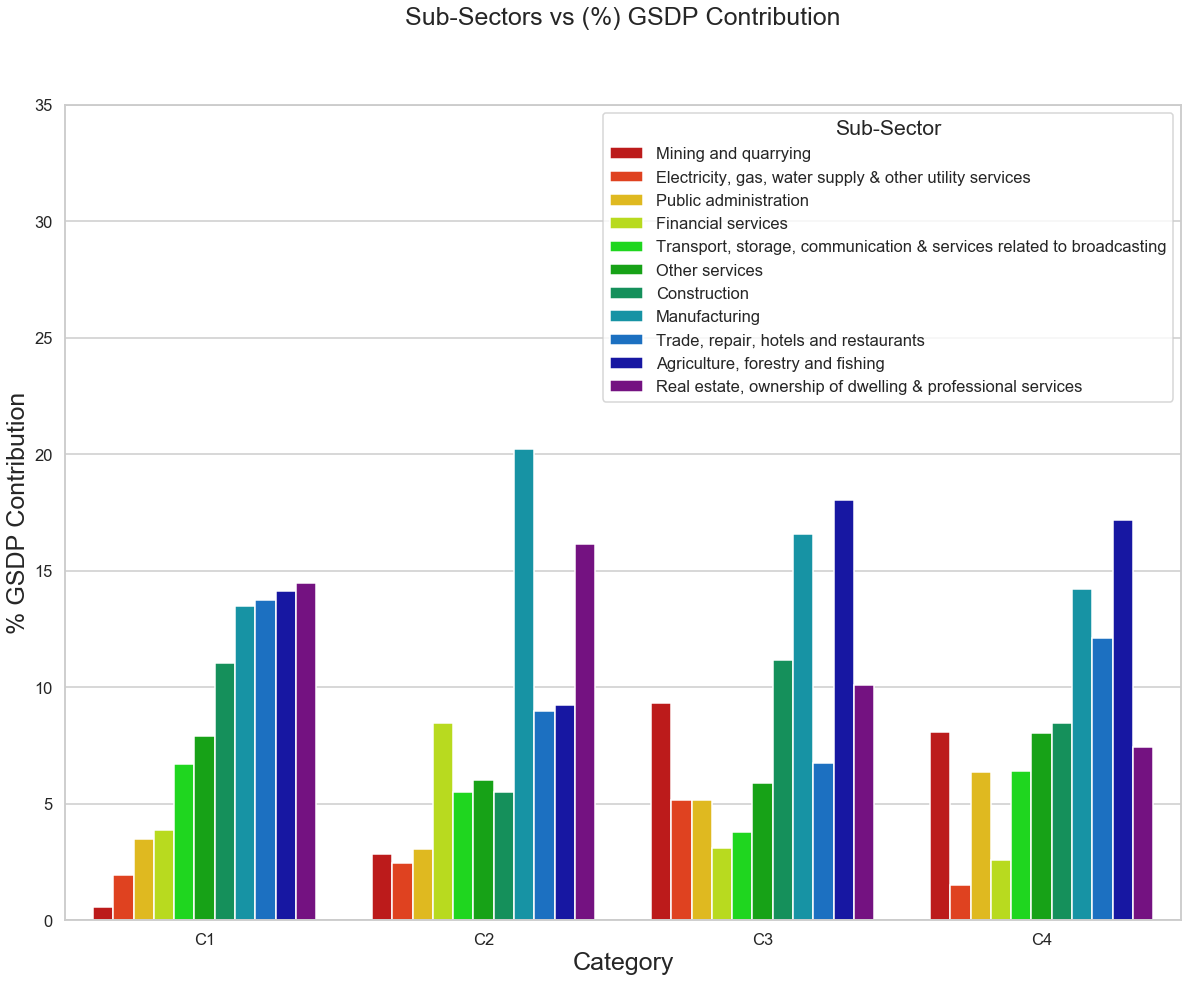

In [132]:
# Plotting the contribution of the sub-sectors as a percentage of the GSDP of category

# Combining all categories in one dataframe and sorting

c1_category["category"]="C1"
c2_category["category"]="C2"
c3_category["category"]="C3"
c4_category["category"]="C4"
gsdp_cat=pd.concat((c1_category,c2_category,c3_category,c4_category))
gsdp_cat.columns='2014-15','Sub-Sector','%Contribution','Category'
gsdp_cat=gsdp_cat.sort_values(by=['Category','%Contribution',])

# Setting gridlines,context and size of the figure

sns.set_style("whitegrid")
sns.set_context('talk')
plt.figure(figsize=(20,15))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 80


# Using barplot for categorical visualisation

sns.barplot(x='Category',y='%Contribution',hue='Sub-Sector',data=gsdp_cat,palette='nipy_spectral_r')
plt.xticks(rotation=0)

# Setting labels for x-axis, y-axis and title

plt.xlabel("Category")
plt.ylabel("% GSDP Contribution")
plt.title("Sub-Sectors vs (%) GSDP Contribution",loc='center')
plt.yticks(np.arange(0,40,5))


plt.show()

**Questions and Answers:**

**1: How does the GDP distribution of the top states(C1) differ from the others?**



As we can see from the above plot for the top sector(C1), few sub-sectors('Manufacturing','Trade,repair,hotels and resturants', 'Agriculture, forestry and fishing' and 'Real estate, ownership of dwelling & professional services') are contributing approximately the same percentage unlike with the others categories they are not consistent.

**2: Which sub-sectors seem to be correlated with high GDP?**

From the above graph, we can see some of the sub-sectors which to be correlated with high GDP, they are "Manufacturing" and "Real estate, ownership of dwelling & professional services".


**3. Which sub-sectors do the various categories need to focus on?**

Taking reference from the above plot the sub-sectors from various categories need to focus on are "Electricity, gas, water supply & other utility services", "Mining and quarrying", "Public administration" and "Financial services"

**4. Consider each of the category and share your thoughts of which sub-sectors is necessary or possible to improve if we are intend to?**

Since "Real estate, ownership of dwelling & professional services","Agriculture, forestry and fishing", "Manufacturing Sector" and "Trade, repair, hotels and restaurants" are growing, and these sub-sectors "Transport, storage, communication & services related to broadcasting" and "Other services" are not contributing in same pace.
so we can think of them to improve.

**Recommendations for each category to improve the per capita GDP**

**C1: Firstly**, we should increase the productivity in "Mining and quarrying" and "Electricity, gas, water supply & other utility services".
    From the graph it is clearly showing that we are ignoring these sub-sectors values which will ultimately yield to boost the per capita GDP if we take care.     
 **Secondly**, Since this is Top_category, We can easily think to improve the sub-sectors "Financial services" and "Transport, "storage, communication & services related to broadcasting" and "Other services".

**C2: Firstly**, This is the only category where %contribution GSDP of "Agriculture" is less than 10%, As India's primary sector is "Agriculture", we should keep this in mind to improve.       
**Secondly**, also we need to keep focus on  "Electricity, gas, water supply & other utility services", "Mining and quarrying" and "Public administration" as this category produces high GDP.

**C3: Firstly**, The Sub-Sectors "Financial services" and "Transport, storage, communication & services related to broadcasting" are pretty bad. We should never let these Sub-Sectors goes below 10%. Since all the other Sub-Sectors are in par we can think to improve these and eventually it will boost the per capita GDP.      
**Secondly**, Sub-Sector "Trade, repair, hotels and restaurants" is also less compared to the other categories. Since we have good contribution from "Manufacturing" Sub-Sector, We can develop this easily by modernizing the region which are in this category. 

**C4: Firstly**, This is the only category where the Sub-Sector "Real estate, ownership of dwelling & professional services" is less than 10% and "Agriculture, forestry and fishing" is doing good, which means most of the regions are rural areas. 
    so we can think of improving "Transport, storage, communication & services related to broadcasting", "Other services" and "Construction" which will add good amount of value to the GDP.       
    **Secondly** 
    The Sub-Sectors "Electricity, gas, water supply & other utility services" and "Financial services" are pretty low when compared with other categories. This is happening due to the low development. We can improve by providing with "Electricity, gas, water supply & other utility services" and "Financial services"  which will increase the standard of the people living in this category and lead us to the growth of the per capita GDP.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# GDP Analysis(Data II)

In [133]:
# As said at the top of this notebook all dataset are placed in same path as .ipynb file

# file_name: rs_session243_au570_1.1.csv

In [134]:
# importing csv files 

drop_out=pd.read_csv("rs_session243_au570_1.1.csv",engine='python',encoding='ISO-8859-1')


In [135]:
drop_out.columns

Index(['Sl. No.', 'Level of Education - State', 'Primary - 2012-2013',
       'Primary - 2014-2015', 'Primary - 2014-2015.1',
       'Upper Primary - 2012-2013', 'Upper Primary - 2013-2014',
       'Upper Primary - 2014-2015', 'Secondary - 2012-2013',
       'Secondary - 2013-2014', 'Secondary - 2014-2015',
       'Senior Secondary - 2012-2013', 'Senior Secondary - 2013-2014',
       'Senior Secondary - 2014-2015'],
      dtype='object')

In [136]:
# Keeping the drop-out rates only for 2014-2015 aand dropping the others

drop_out=drop_out.loc[:,~drop_out.columns.isin(['Primary - 2012-2013','Primary - 2014-2015.1','Upper Primary - 2012-2013',
                             'Upper Primary - 2013-2014','Secondary - 2012-2013','Secondary - 2013-2014',
                             'Senior Secondary - 2012-2013','Senior Secondary - 2013-2014'])]

drop_out.head()

,Sl. No.,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
0,1,A & N Islands,1.21,1.69,9.87,16.93
1,2,Andhra Pradesh,4.35,5.20,15.71,NaN
2,3,Arunachal Pradesh,10.89,6.71,17.11,18.42
3,4,Assam,7.44,10.51,27.06,NaN
4,5,Bihar,2.09,4.08,25.90,NaN


In [137]:
# Cleaning the data 

# Checking the null values in columns

drop_out.isnull().sum(axis=0)

Sl. No.                         0
Level of Education - State      0
Primary - 2014-2015             4
Upper Primary - 2014-2015       2
Secondary - 2014-2015           1
Senior Secondary - 2014-2015    9
dtype: int64

In [138]:
# For column "Senior Secondary - 2014-2015" there are 9 null values 
# we can't make any kind of assumptions as our data might give us wrong analysis
# so, it's better to remove the column and proceed with the next


drop_out=drop_out.loc[:,~drop_out.columns.isin(["Senior Secondary - 2014-2015"])]
drop_out.head()

,Sl. No.,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,1,A & N Islands,1.21,1.69,9.87
1,2,Andhra Pradesh,4.35,5.20,15.71
2,3,Arunachal Pradesh,10.89,6.71,17.11
3,4,Assam,7.44,10.51,27.06
4,5,Bihar,2.09,4.08,25.90


In [139]:
# Checking the rows having null values more than 1

drop_out.isnull().sum(axis=1)>1

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

In [140]:
# Dropping the rows having null values more than 1 

drop_out=drop_out.loc[drop_out.isnull().sum(axis=1)<=1,:]


In [141]:
# Checking the null columns after the above execution

drop_out.isnull().sum(axis=0)

Sl. No.                       0
Level of Education - State    0
Primary - 2014-2015           2
Upper Primary - 2014-2015     1
Secondary - 2014-2015         0
dtype: int64

In [142]:
# Lets describe the "Primary - 2014-2015" column 

drop_out['Primary - 2014-2015'].describe()

count    33.000000
mean      4.919394
std       4.990541
min       0.200000
25%       1.210000
50%       3.070000
75%       7.080000
max      19.410000
Name: Primary - 2014-2015, dtype: float64

In [143]:
# For "Primary - 2014-2015" the "ALl India" Drop-out rate is 4.34
# And the mean of this column is 4.91
# As the mean will not affect the All India rates,
# It's fine to put the mean value in the null rows of this column


drop_out['Primary - 2014-2015']=drop_out['Primary - 2014-2015'].astype(object).fillna(round(4.919394,2))



In [144]:
# Now, describing the 'Upper Primary - 2014-2015' column

drop_out['Upper Primary - 2014-2015'].describe()

count    34.000000
mean      4.097059
std       2.604506
min       0.070000
25%       2.067500
50%       3.935000
75%       5.717500
max      10.510000
Name: Upper Primary - 2014-2015, dtype: float64

In [145]:
# Same for "Upper Primary - 2014-2015" the "ALl India" drop-out rate is 4.03
# And for the mean of this column is 4.09
# so, It's okay to put the mean calue in the null row of this column


drop_out['Upper Primary - 2014-2015']=drop_out['Upper Primary - 2014-2015'].astype(object).fillna(round(4.097059,2))

In [146]:
# Checking of null values in all the columns

drop_out.isnull().sum(axis=0)

Sl. No.                       0
Level of Education - State    0
Primary - 2014-2015           0
Upper Primary - 2014-2015     0
Secondary - 2014-2015         0
dtype: int64

Now all the null values are removed, lets proceed with our analysis.

**Analyzing for any coorelation of GDP per capita with dropout rates in education(primary,upper primary and secondary) for year 2014-2015 for the states**

In [147]:
gsdp_per_capita=gsva_2[gsva_2["Item"]=='Per Capita GSDP (Rs.)']

In [148]:
# Keeping the same format in column 'state' with gsdp_per_capita dataframe and drop_out dataframe

gsdp_per_capita1=[]
for sp in gsdp_per_capita.loc[:,'State']:
    gsdp_per_capita1.append(" ".join(sp.split("_")))

gsdp_per_capita.loc[:,'State']=list(gsdp_per_capita1) 

gsdp_per_capita.head()





,S.No.,Item,2014-15,State
Index,,,,
32,17,Per Capita GSDP (Rs.),104977.0,Andhra Pradesh
65,17,Per Capita GSDP (Rs.),112718.0,Arunachal Pradesh
98,17,Per Capita GSDP (Rs.),60621.0,Assam
131,17,Per Capita GSDP (Rs.),33954.0,Bihar
164,17,Per Capita GSDP (Rs.),250398.0,Chandigarh


In [149]:
# Spelling mismatch is there for state Uttarakhand
# therefore fixing it

drop_out.loc[34,'Level of Education - State']='Uttarakhand'

# Renaming the column name for the "Level of Education - State" to "State" for merging with gsdp_per_capita

drop_out.columns=['Sl. No.', 'State', 'Primary - 2014-2015',
       'Upper Primary - 2014-2015', 'Secondary - 2014-2015']

In [150]:
drop_out.tail()

,Sl. No.,State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
32,33,Tripura,3.58,1.99,28.42
33,34,Uttar Pradesh,7.08,2.70,10.22
34,35,Uttarakhand,3.07,1.19,10.40
35,36,West Bengal,2.91,4.30,17.80
36,All India,All India,4.34,4.03,17.06


In [151]:
# Now, merging the "drop_out" dataframe with "gsdp_per_capita" dataframe.

drop_out_per_capita_gsdp=pd.merge(drop_out,gsdp_per_capita,on='State',how='inner')

 # Removing unnecessary columns('Sl.No.'','S,No.')
    
drop_out_per_capita_gsdp=drop_out_per_capita_gsdp.loc[:,~drop_out_per_capita_gsdp.columns.isin(['Sl. No.','S.No.','Item'])]

# Renaming the column '2014-15' with 'Per Capita GSDP (Rs.)'

drop_out_per_capita_gsdp.columns=['State', 'Primary','Upper Primary', 'Secondary','Per Capita GSDP (Rs.)']

drop_out_per_capita_gsdp.head()

,State,Primary,Upper Primary,Secondary,Per Capita GSDP (Rs.)
0,Andhra Pradesh,4.35,5.20,15.71,104977.0
1,Arunachal Pradesh,10.89,6.71,17.11,112718.0
2,Assam,7.44,10.51,27.06,60621.0
3,Bihar,2.09,4.08,25.90,33954.0
4,Delhi,4.92,0.76,11.81,274041.0


In [152]:
# Now finding the correlation between 'drop out rates' and 'Per Capita GSDP'

drp_rate_corr=drop_out_per_capita_gsdp.corr(method='spearman')
drp_rate_corr

,Primary,Upper Primary,Secondary,Per Capita GSDP (Rs.)
Primary,1.000000,0.506182,0.310229,-0.575485
Upper Primary,0.506182,1.000000,0.559915,-0.598291
Secondary,0.310229,0.559915,1.000000,-0.484811
Per Capita GSDP (Rs.),-0.575485,-0.598291,-0.484811,1.000000


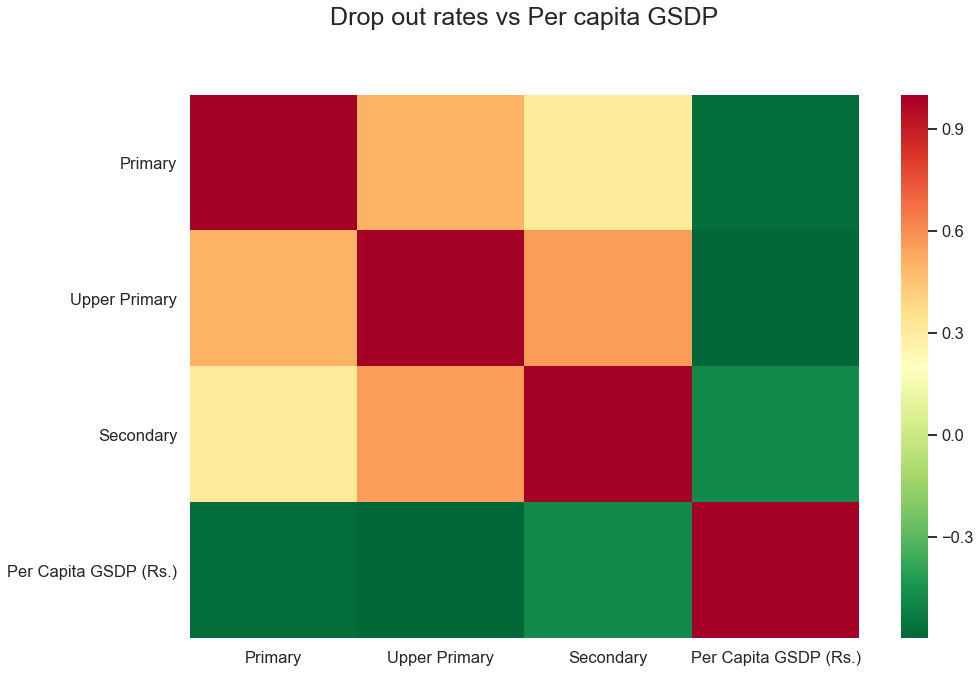

In [153]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice

sns.heatmap(drp_rate_corr, cmap="RdYlGn_r")

plt.title("Drop out rates vs Per capita GSDP")
plt.yticks(rotation=0)
plt.show()



From the above heat map we can tell that the drop rates is inversely proportional to the Per capita GSDP. So, if the drop rates are high per capita GSDP will be low and if drop rates are low per capita GSDP will be high. As we can see that for Secondary section which is having a negative value,it is close to the positive mark which means ths **drop rates are high in Secondary section**. Others Primary and Upper primary section is having low drop outs compared to the secondary.

**Hence, we can conclude that Drop out rates does affect the per capita GSDP if it is not taken care of.**